1) age

2) sex

3) chest pain type (4 values)

4) resting blood pressure

5) serum cholestoral in mg/dl

6) fasting blood sugar > 120 mg/dl

7) resting electrocardiographic results (values 0,1,2)

8) maximum heart rate achieved

9) exercise induced angina

10) oldpeak = ST depression induced by exercise relative to rest

11) the slope of the peak exercise ST segment

12) number of major vessels (0-3) colored by flourosopy

13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [1]:
import pandas as pd
import seaborn as sns
sns.set(font_scale = 1.2)
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import time
from sklearn.metrics import classification_report,confusion_matrix,balanced_accuracy_score,log_loss,ConfusionMatrixDisplay,precision_score,f1_score,recall_score

In [2]:
df = pd.read_csv(r'heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

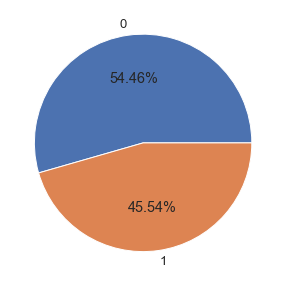

In [7]:
freq = df['target'].value_counts().tolist()
label = sorted(df['target'].unique().tolist())
plt.figure(figsize=(5,5))
plt.pie(freq, labels = label,autopct='%1.2f%%')
plt.show()

In [8]:
df.duplicated().sum()

1

In [9]:
df = df.drop_duplicates()
df.duplicated().sum()

0

<AxesSubplot:>

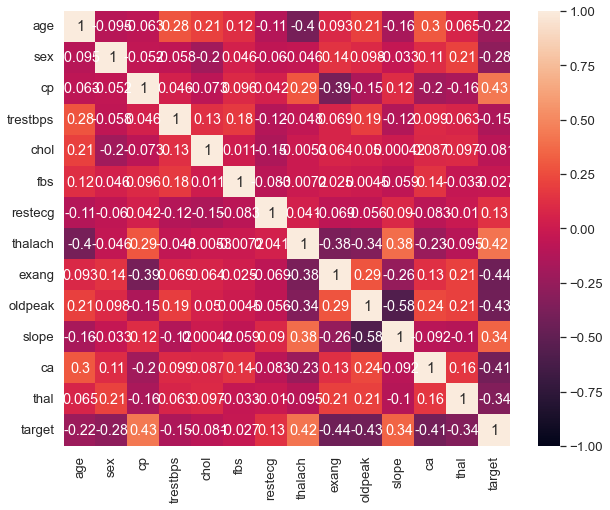

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),vmin=-1, vmax=1,annot=True)

In [34]:
df.columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [12]:
X=df.iloc[:,df.columns !='target']
y=df.iloc[:,df.columns =='target']

In [13]:
from imblearn.over_sampling import RandomOverSampler
smote = RandomOverSampler()
X, y = smote.fit_resample(X, y)

In [14]:
y['target'].value_counts()

0    164
1    164
Name: target, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.20, random_state=101)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
label = sorted(y_train['target'].unique().tolist())
cm_size = (10, 6.5)

In [18]:
label

[0, 1]

Results for Logistic regression:-

********************************************************************************

Training time(sec) =  8.239647150039673
Prediction time(sec) =  0.0009949207305908203


********************************************************************************

Training accuracy =  0.8473282442748091
Testing accuracy =  0.8181818181818182


********************************************************************************

Training log_loss =  0.3437779490765977
Testing log_loss =  0.4022590938257433


********************************************************************************


No of missclassified for class 0 (test data) = 6 
No of missclassified for class 1 (test data) = 6 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  12
Total % of missclassified points (test data) =  18.181818181818183


********************************************************************************


Confusion matrix

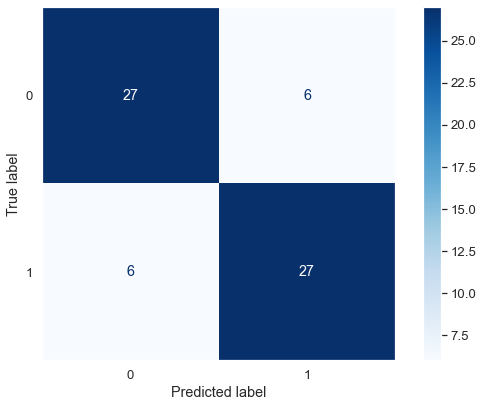



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        33
           1       0.82      0.82      0.82        33

    accuracy                           0.82        66
   macro avg       0.82      0.82      0.82        66
weighted avg       0.82      0.82      0.82        66



********************************************************************************


In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0, 
                        penalty='l2',           #or 'l1','elasticnet','none'
                        solver='lbfgs',         #or 'newton-cg'
                        multi_class='auto',     #or 'ovr','multinomial'
                        l1_ratio=None,          #or 0 <= l1_ratio <= 1 but only used if penalty='elasticnet'
                        class_weight='balanced', n_jobs=-1)

print('Results for Logistic regression:-\n')
start_time = time.time()
lr.fit(X_train,y_train)
lr_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',lr_time)

y_pred1 = lr.predict(X_train)

start_time = time.time()
y_pred = lr.predict(X_test)
lr_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lr_time2)

try:
    y_pred_prob1 = lr.predict_proba(X_train)
    y_pred_prob = lr.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_lr = confusion_matrix(y_test, y_pred)
lr_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_lr = balanced_accuracy_score(y_train,y_pred1)
acc2_lr = balanced_accuracy_score(y_test,y_pred)
loss1_lr = log_loss(y_train,y_pred_prob1)
loss2_lr = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_lr)
print('Testing accuracy = ',acc2_lr)
print('\n')
print('*'*80)  

print('\nTraining log_loss = ',loss1_lr)
print('Testing log_loss = ',loss2_lr)
print('\n')
print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_lr[i])-cm_lr[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',lr_miss)
print('Total % of missclassified points (test data) = ',(lr_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 

LR = [acc1_lr, acc2_lr, lr_miss, lr_miss/len(y_test), lr_time, lr_time2]

Results for Linear support vector classifier:-

********************************************************************************

Training time(sec) =  0.02000713348388672
Prediction time(sec) =  0.0


********************************************************************************

Training accuracy =  0.851145038167939
Testing accuracy =  0.8333333333333334


********************************************************************************


No of missclassified for class 0 (test data) = 6 
No of missclassified for class 1 (test data) = 5 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  11
Total % of missclassified points (test data) =  16.666666666666664


********************************************************************************


Confusion matrix:


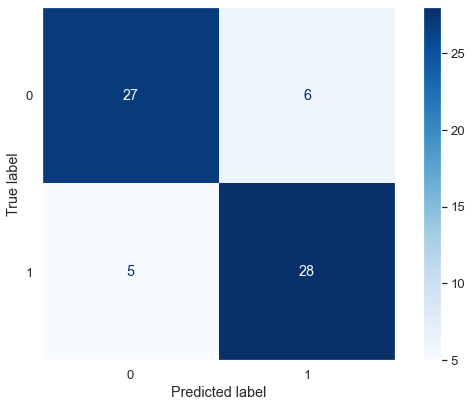



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        33
           1       0.82      0.85      0.84        33

    accuracy                           0.83        66
   macro avg       0.83      0.83      0.83        66
weighted avg       0.83      0.83      0.83        66



********************************************************************************


In [20]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=1.0, 
                 penalty='l2',            #or 'l1'
                 loss='squared_hinge',    #or 'hinge'
                 class_weight='balanced')

print('Results for Linear support vector classifier:-\n')
start_time = time.time()
lsvc.fit(X_train,y_train)
lsvc_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',lsvc_time)

y_pred1 = lsvc.predict(X_train)

start_time = time.time()
y_pred = lsvc.predict(X_test)
lsvc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lsvc_time2)

try:
    y_pred_prob1 = lsvc.predict_proba(X_train)
    y_pred_prob = lsvc.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_lsvc = confusion_matrix(y_test, y_pred)
lsvc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_lsvc = balanced_accuracy_score(y_train,y_pred1)
acc2_lsvc = balanced_accuracy_score(y_test,y_pred)
# loss1_lsvc = log_loss(y_train,y_pred_prob1)
# loss2_lsvc = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_lsvc)
print('Testing accuracy = ',acc2_lsvc)
print('\n')
print('*'*80)  

# print('\nTraining log_loss = ',loss1_lsvc)
# print('Testing log_loss = ',loss2_lsvc)
# print('\n')
# print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_lsvc[i])-cm_lsvc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',lsvc_miss)
print('Total % of missclassified points (test data) = ',(lsvc_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 

LSVC = [acc1_lsvc, acc2_lsvc, lsvc_miss, lsvc_miss/len(y_test), lsvc_time, lsvc_time2]

Results for Kernal support vector classifier:-

********************************************************************************

Training time(sec) =  0.008005857467651367
Prediction time(sec) =  0.005014181137084961


********************************************************************************

Training accuracy =  0.9122137404580153
Testing accuracy =  0.8181818181818182


********************************************************************************


No of missclassified for class 0 (test data) = 6 
No of missclassified for class 1 (test data) = 6 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  12
Total % of missclassified points (test data) =  18.181818181818183


********************************************************************************


Confusion matrix:


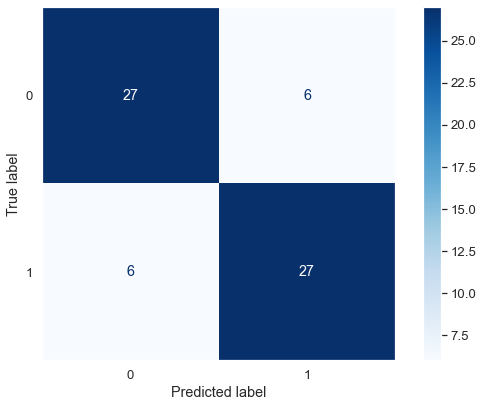



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        33
           1       0.82      0.82      0.82        33

    accuracy                           0.82        66
   macro avg       0.82      0.82      0.82        66
weighted avg       0.82      0.82      0.82        66



********************************************************************************


In [21]:
from sklearn.svm import SVC
svc = SVC(C=1.0, 
          kernel='rbf',                      #or 'poly'
          degree=3,
          coef0=0.0,                         #Independent term in kernel function, it is only significant in ‘poly’ and ‘sigmoid’.
          gamma='scale',                     #or 0.01,0.1,1.0
          decision_function_shape='ovr',      #or 'ovo'
          class_weight='balanced')

print('Results for Kernal support vector classifier:-\n')
start_time = time.time()
svc.fit(X_train,y_train)
svc_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',svc_time)

y_pred1 = svc.predict(X_train)

start_time = time.time()
y_pred = svc.predict(X_test)
svc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',svc_time2)

try:
    y_pred_prob1 = svc.predict_proba(X_train)
    y_pred_prob = svc.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_svc = confusion_matrix(y_test, y_pred)
svc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_svc = balanced_accuracy_score(y_train,y_pred1)
acc2_svc = balanced_accuracy_score(y_test,y_pred)
# loss1_svc = log_loss(y_train,y_pred_prob1)
# loss2_svc = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_svc)
print('Testing accuracy = ',acc2_svc)
print('\n')
print('*'*80)  

# print('\nTraining log_loss = ',loss1_svc)
# print('Testing log_loss = ',loss2_svc)
# print('\n')
# print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_svc[i])-cm_svc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',svc_miss)
print('Total % of missclassified points (test data) = ',(svc_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 

SVC = [acc1_svc, acc2_svc, svc_miss, svc_miss/len(y_test), svc_time, svc_time2]

Results for K-Neighbors classifier:-

********************************************************************************

Training time(sec) =  0.009020566940307617
Prediction time(sec) =  0.12726831436157227


********************************************************************************

Training accuracy =  0.8587786259541985
Testing accuracy =  0.8787878787878788


********************************************************************************

Training log_loss =  0.267242802694738
Testing log_loss =  1.3459410622221095


********************************************************************************


No of missclassified for class 0 (test data) = 5 
No of missclassified for class 1 (test data) = 3 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  8
Total % of missclassified points (test data) =  12.121212121212121


********************************************************************************


Confusion matr

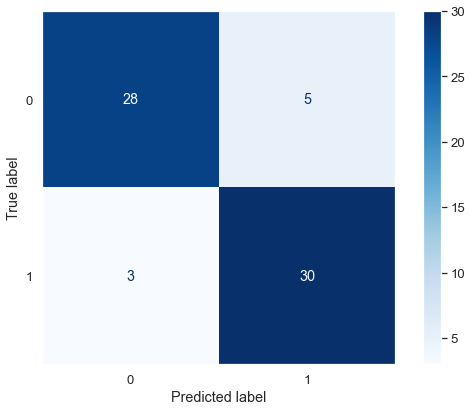



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.86      0.91      0.88        33

    accuracy                           0.88        66
   macro avg       0.88      0.88      0.88        66
weighted avg       0.88      0.88      0.88        66



********************************************************************************


In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, 
                           weights='uniform', #or 'distance'
                           n_jobs=-1)

print('Results for K-Neighbors classifier:-\n')
start_time = time.time()
knn.fit(X_train,y_train)
knn_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',knn_time)

y_pred1 = knn.predict(X_train)

start_time = time.time()
y_pred = knn.predict(X_test)
knn_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',knn_time2)

try:
    y_pred_prob1 = knn.predict_proba(X_train)
    y_pred_prob = knn.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_knn = confusion_matrix(y_test, y_pred)
knn_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_knn = balanced_accuracy_score(y_train,y_pred1)
acc2_knn = balanced_accuracy_score(y_test,y_pred)
loss1_knn = log_loss(y_train,y_pred_prob1)
loss2_knn = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_knn)
print('Testing accuracy = ',acc2_knn)
print('\n')
print('*'*80)  

print('\nTraining log_loss = ',loss1_knn)
print('Testing log_loss = ',loss2_knn)
print('\n')
print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_knn[i])-cm_knn[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',knn_miss)
print('Total % of missclassified points (test data) = ',(knn_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 

KNN = [acc1_knn, acc2_knn, knn_miss, knn_miss/len(y_test), knn_time, knn_time2]

Results for Linear Discriminant classifier:-

********************************************************************************

Training time(sec) =  0.003996849060058594
Prediction time(sec) =  0.0009996891021728516


********************************************************************************

Training accuracy =  0.8396946564885497
Testing accuracy =  0.8333333333333334


********************************************************************************

Training log_loss =  0.35101692686766467
Testing log_loss =  0.40239323528444754


********************************************************************************


No of missclassified for class 0 (test data) = 6 
No of missclassified for class 1 (test data) = 5 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  11
Total % of missclassified points (test data) =  16.666666666666664


********************************************************************************




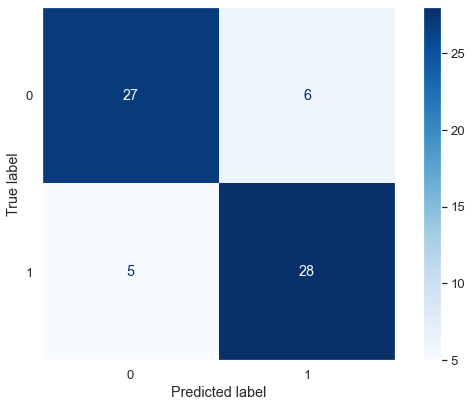



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        33
           1       0.82      0.85      0.84        33

    accuracy                           0.83        66
   macro avg       0.83      0.83      0.83        66
weighted avg       0.83      0.83      0.83        66



********************************************************************************


In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(priors = [0.5,0.5], n_components=None) #or priors = [1,1]

print('Results for Linear Discriminant classifier:-\n')
start_time = time.time()
lda.fit(X_train,y_train)
lda_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',lda_time)

y_pred1 = lda.predict(X_train)

start_time = time.time()
y_pred = lda.predict(X_test)
lda_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lda_time2)

try:
    y_pred_prob1 = lda.predict_proba(X_train)
    y_pred_prob = lda.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_lda = confusion_matrix(y_test, y_pred)
lda_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_lda = balanced_accuracy_score(y_train,y_pred1)
acc2_lda = balanced_accuracy_score(y_test,y_pred)
loss1_lda = log_loss(y_train,y_pred_prob1)
loss2_lda = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_lda)
print('Testing accuracy = ',acc2_lda)
print('\n')
print('*'*80)  

print('\nTraining log_loss = ',loss1_lda)
print('Testing log_loss = ',loss2_lda)
print('\n')
print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_lda[i])-cm_lda[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',lda_miss)
print('Total % of missclassified points (test data) = ',(lda_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 

LDA = [acc1_lda, acc2_lda, lda_miss, lda_miss/len(y_test), lda_time, lda_time2]

Results for Quadratic Discriminant classifier:-

********************************************************************************

Training time(sec) =  0.016003131866455078
Prediction time(sec) =  0.000997304916381836


********************************************************************************

Training accuracy =  0.8625954198473282
Testing accuracy =  0.7878787878787878


********************************************************************************

Training log_loss =  0.33033266661512445
Testing log_loss =  0.7345066567676316


********************************************************************************


No of missclassified for class 0 (test data) = 4 
No of missclassified for class 1 (test data) = 10 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  14
Total % of missclassified points (test data) =  21.21212121212121


********************************************************************************



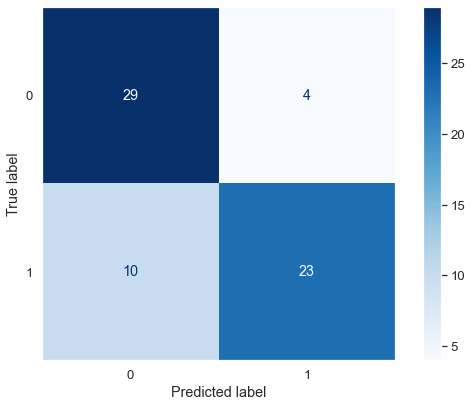



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.74      0.88      0.81        33
           1       0.85      0.70      0.77        33

    accuracy                           0.79        66
   macro avg       0.80      0.79      0.79        66
weighted avg       0.80      0.79      0.79        66



********************************************************************************


In [24]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(priors = [0.5,0.5], reg_param=0.0) #or priors = [1,1]

print('Results for Quadratic Discriminant classifier:-\n')
start_time = time.time()
qda.fit(X_train,y_train)
qda_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',qda_time)

y_pred1 = qda.predict(X_train)

start_time = time.time()
y_pred = qda.predict(X_test)
qda_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',qda_time2)

try:
    y_pred_prob1 = qda.predict_proba(X_train)
    y_pred_prob = qda.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_qda = confusion_matrix(y_test, y_pred)
qda_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_qda = balanced_accuracy_score(y_train,y_pred1)
acc2_qda = balanced_accuracy_score(y_test,y_pred)
loss1_qda = log_loss(y_train,y_pred_prob1)
loss2_qda = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_qda)
print('Testing accuracy = ',acc2_qda)
print('\n')
print('*'*80)  

print('\nTraining log_loss = ',loss1_qda)
print('Testing log_loss = ',loss2_qda)
print('\n')
print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_qda[i])-cm_qda[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',qda_miss)
print('Total % of missclassified points (test data) = ',(qda_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 

QDA = [acc1_qda, acc2_qda, qda_miss, qda_miss/len(y_test), qda_time, qda_time2]

Results for Decision Tree classifier:-

********************************************************************************

Training time(sec) =  0.008032083511352539
Prediction time(sec) =  0.0


********************************************************************************

Training accuracy =  1.0
Testing accuracy =  0.7727272727272727


********************************************************************************

Training log_loss =  9.992007221626413e-16
Testing log_loss =  7.849721907934247


********************************************************************************


No of missclassified for class 0 (test data) = 6 
No of missclassified for class 1 (test data) = 9 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  15
Total % of missclassified points (test data) =  22.727272727272727


********************************************************************************


Confusion matrix:


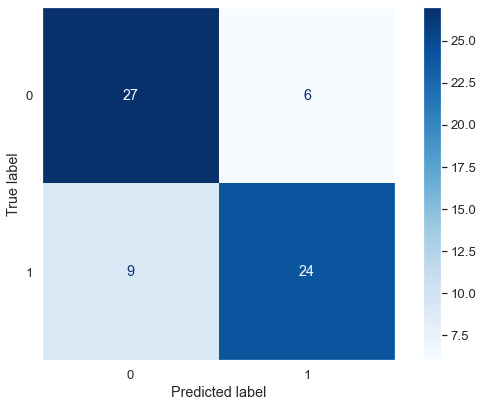



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        33
           1       0.80      0.73      0.76        33

    accuracy                           0.77        66
   macro avg       0.78      0.77      0.77        66
weighted avg       0.78      0.77      0.77        66



********************************************************************************


In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini',          #or 'entropy'
                             splitter='best',           #or 'random'
                             max_depth=None,            #or 10,15,20
                             max_features=None,         #or 0.5,0.6,0.7,0.8
                             class_weight='balanced') 

print('Results for Decision Tree classifier:-\n')
start_time = time.time()
dtc.fit(X_train,y_train)
dtc_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',dtc_time)

y_pred1 = dtc.predict(X_train)

start_time = time.time()
y_pred = dtc.predict(X_test)
dtc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',dtc_time2)

try:
    y_pred_prob1 = dtc.predict_proba(X_train)
    y_pred_prob = dtc.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_dtc = confusion_matrix(y_test, y_pred)
dtc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_dtc = balanced_accuracy_score(y_train,y_pred1)
acc2_dtc = balanced_accuracy_score(y_test,y_pred)
loss1_dtc = log_loss(y_train,y_pred_prob1)
loss2_dtc = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_dtc)
print('Testing accuracy = ',acc2_dtc)
print('\n')
print('*'*80)  

print('\nTraining log_loss = ',loss1_dtc)
print('Testing log_loss = ',loss2_dtc)
print('\n')
print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_dtc[i])-cm_dtc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',dtc_miss)
print('Total % of missclassified points (test data) = ',(dtc_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 

DTC = [acc1_dtc, acc2_dtc, dtc_miss, dtc_miss/len(y_test), dtc_time, dtc_time2]

Results for Extra Tree classifier:-

********************************************************************************

Training time(sec) =  0.007999181747436523
Prediction time(sec) =  0.00099945068359375


********************************************************************************

Training accuracy =  1.0
Testing accuracy =  0.803030303030303


********************************************************************************

Training log_loss =  9.992007221626413e-16
Testing log_loss =  6.80309232020968


********************************************************************************


No of missclassified for class 0 (test data) = 3 
No of missclassified for class 1 (test data) = 10 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  13
Total % of missclassified points (test data) =  19.696969696969695


********************************************************************************


Confusion matrix:


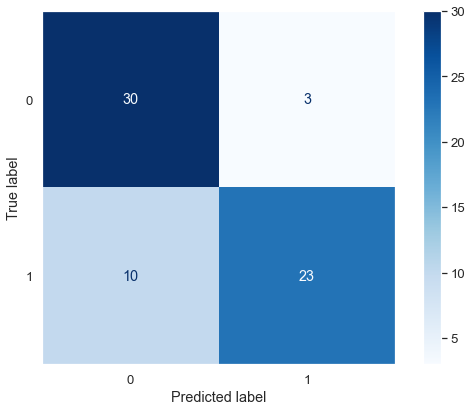



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        33
           1       0.88      0.70      0.78        33

    accuracy                           0.80        66
   macro avg       0.82      0.80      0.80        66
weighted avg       0.82      0.80      0.80        66



********************************************************************************


In [26]:
from sklearn.tree import ExtraTreeClassifier
etc = ExtraTreeClassifier(criterion='gini',          #or 'entropy'
                            splitter='best',           #or 'random'
                            max_depth=None,            #or 10,15,20
                            max_features=None,         #or 0.5,0.6,0.7,0.8
                            class_weight='balanced') 

print('Results for Extra Tree classifier:-\n')
start_time = time.time()
etc.fit(X_train,y_train)
etc_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',etc_time)

y_pred1 = etc.predict(X_train)

start_time = time.time()
y_pred = etc.predict(X_test)
etc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',etc_time2)

try:
    y_pred_prob1 = etc.predict_proba(X_train)
    y_pred_prob = etc.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_etc = confusion_matrix(y_test, y_pred)
etc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_etc = balanced_accuracy_score(y_train,y_pred1)
acc2_etc = balanced_accuracy_score(y_test,y_pred)
loss1_etc = log_loss(y_train,y_pred_prob1)
loss2_etc = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_etc)
print('Testing accuracy = ',acc2_etc)
print('\n')
print('*'*80)  

print('\nTraining log_loss = ',loss1_etc)
print('Testing log_loss = ',loss2_etc)
print('\n')
print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_etc[i])-cm_etc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',etc_miss)
print('Total % of missclassified points (test data) = ',(etc_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 

ETC = [acc1_etc, acc2_etc, etc_miss, etc_miss/len(y_test), etc_time, etc_time2]

Results for Random Forest classifier:-

********************************************************************************

Training time(sec) =  0.4287428855895996
Prediction time(sec) =  0.11020731925964355


********************************************************************************

Training accuracy =  0.8969465648854962
Testing accuracy =  0.8484848484848484


********************************************************************************

Training log_loss =  0.30243129013923464
Testing log_loss =  0.36569964035864133


********************************************************************************


No of missclassified for class 0 (test data) = 7 
No of missclassified for class 1 (test data) = 3 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  10
Total % of missclassified points (test data) =  15.151515151515152


********************************************************************************


Confusion 

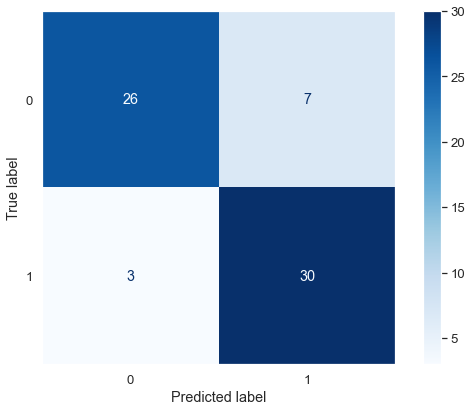



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.81      0.91      0.86        33

    accuracy                           0.85        66
   macro avg       0.85      0.85      0.85        66
weighted avg       0.85      0.85      0.85        66



********************************************************************************


In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,
                             bootstrap=True,
                             criterion='gini',          #or 'entropy'
                             max_depth=3,            #or 10,15,20
                             max_features=None,         #or 0.5,0.6,0.7,0.8
                             max_samples=None,          #or 0.5,0.6,0.7,0.8
                             class_weight='balanced',
                             n_jobs=-1) 

print('Results for Random Forest classifier:-\n')
start_time = time.time()
rfc.fit(X_train,y_train)
rfc_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',rfc_time)

y_pred1 = rfc.predict(X_train)

start_time = time.time()
y_pred = rfc.predict(X_test)
rfc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',rfc_time2)

try:
    y_pred_prob1 = rfc.predict_proba(X_train)
    y_pred_prob = rfc.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_rfc = confusion_matrix(y_test, y_pred)
rfc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_rfc = balanced_accuracy_score(y_train,y_pred1)
acc2_rfc = balanced_accuracy_score(y_test,y_pred)
loss1_rfc = log_loss(y_train,y_pred_prob1)
loss2_rfc = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_rfc)
print('Testing accuracy = ',acc2_rfc)
print('\n')
print('*'*80)  

print('\nTraining log_loss = ',loss1_rfc)
print('Testing log_loss = ',loss2_rfc)
print('\n')
print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_rfc[i])-cm_rfc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',rfc_miss)
print('Total % of missclassified points (test data) = ',(rfc_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 

RFC = [acc1_rfc, acc2_rfc, rfc_miss, rfc_miss/len(y_test), rfc_time, rfc_time2]

Results for Extra Trees classifier:-

********************************************************************************

Training time(sec) =  0.547041654586792
Prediction time(sec) =  0.10942220687866211


********************************************************************************

Training accuracy =  1.0
Testing accuracy =  0.8787878787878788


********************************************************************************

Training log_loss =  0.09370715443669539
Testing log_loss =  0.38157798489224104


********************************************************************************


No of missclassified for class 0 (test data) = 4 
No of missclassified for class 1 (test data) = 4 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  8
Total % of missclassified points (test data) =  12.121212121212121


********************************************************************************


Confusion matrix:


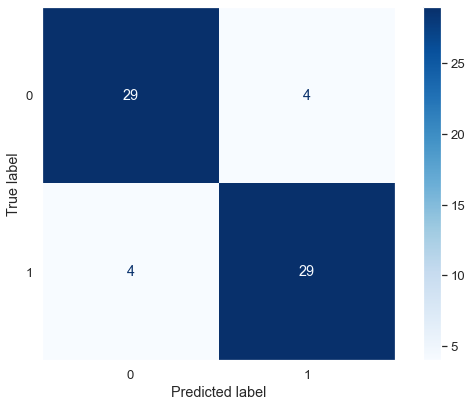



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.88      0.88      0.88        33

    accuracy                           0.88        66
   macro avg       0.88      0.88      0.88        66
weighted avg       0.88      0.88      0.88        66



********************************************************************************


In [28]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=100,
                            bootstrap=True,
                            criterion='gini',          #or 'entropy'
                            max_depth=None,            #or 10,15,20
                            max_features=None,         #or 0.5,0.6,0.7,0.8
                            max_samples=None,          #or 0.5,0.6,0.7,0.8
                            class_weight='balanced',
                            n_jobs=-1) 

print('Results for Extra Trees classifier:-\n')
start_time = time.time()
et.fit(X_train,y_train)
et_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',et_time)

y_pred1 = et.predict(X_train)

start_time = time.time()
y_pred = et.predict(X_test)
et_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',et_time2)

try:
    y_pred_prob1 = et.predict_proba(X_train)
    y_pred_prob = et.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_et = confusion_matrix(y_test, y_pred)
et_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_et = balanced_accuracy_score(y_train,y_pred1)
acc2_et = balanced_accuracy_score(y_test,y_pred)
loss1_et = log_loss(y_train,y_pred_prob1)
loss2_et = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_et)
print('Testing accuracy = ',acc2_et)
print('\n')
print('*'*80)  

print('\nTraining log_loss = ',loss1_et)
print('Testing log_loss = ',loss2_et)
print('\n')
print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_et[i])-cm_et[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',et_miss)
print('Total % of missclassified points (test data) = ',(et_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 

ET = [acc1_et, acc2_et, et_miss, et_miss/len(y_test), et_time, et_time2]

Results for Voting classifier:-

********************************************************************************

Training time(sec) =  2.1502249240875244
Prediction time(sec) =  0.21773099899291992


********************************************************************************

Training accuracy =  0.9694656488549618
Testing accuracy =  0.8636363636363636


********************************************************************************


No of missclassified for class 0 (test data) = 5 
No of missclassified for class 1 (test data) = 4 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  9
Total % of missclassified points (test data) =  13.636363636363635


********************************************************************************


Confusion matrix:


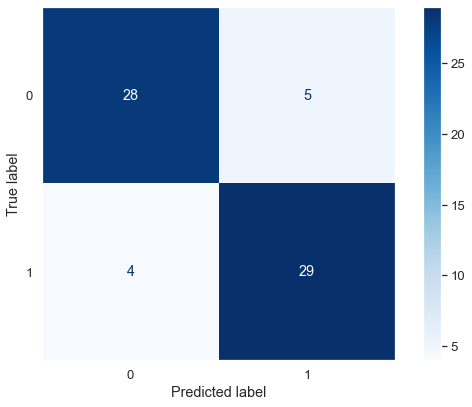



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.85      0.88      0.87        33

    accuracy                           0.86        66
   macro avg       0.86      0.86      0.86        66
weighted avg       0.86      0.86      0.86        66



********************************************************************************


In [29]:
from sklearn.ensemble import VotingClassifier
vtc = VotingClassifier(estimators=[('rfc', rfc), ('etc',et)],
                        voting='soft',             #soft takes probability score
                        weights=None,              #weights for each classifier
                        n_jobs=-1) 

print('Results for Voting classifier:-\n')
start_time = time.time()
vtc.fit(X_train,y_train)
vtc_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',vtc_time)

y_pred1 = vtc.predict(X_train)

start_time = time.time()
y_pred = vtc.predict(X_test)
vtc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',vtc_time2)

try:
    y_pred_prob1 = vtc.predict_proba(X_train)
    y_pred_prob = vtc.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_vtc = confusion_matrix(y_test, y_pred)
vtc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_vtc = balanced_accuracy_score(y_train,y_pred1)
acc2_vtc = balanced_accuracy_score(y_test,y_pred)
# loss1_vtc = log_loss(y_train,y_pred_prob1)
# loss2_vtc = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_vtc)
print('Testing accuracy = ',acc2_vtc)
print('\n')
print('*'*80)  

# print('\nTraining log_loss = ',loss1_vtc)
# print('Testing log_loss = ',loss2_vtc)
# print('\n')
# print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_vtc[i])-cm_vtc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',vtc_miss)
print('Total % of missclassified points (test data) = ',(vtc_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 

VTC = [acc1_vtc, acc2_vtc, vtc_miss, vtc_miss/len(y_test), vtc_time, vtc_time2]

Results for Stacking classifier:-

********************************************************************************

Training time(sec) =  8.159245014190674
Prediction time(sec) =  0.45485711097717285


********************************************************************************

Training accuracy =  1.0
Testing accuracy =  0.8636363636363636


********************************************************************************

Training log_loss =  0.18901041294858734
Testing log_loss =  0.3942317049565889


********************************************************************************


No of missclassified for class 0 (test data) = 5 
No of missclassified for class 1 (test data) = 4 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  9
Total % of missclassified points (test data) =  13.636363636363635


********************************************************************************


Confusion matrix:


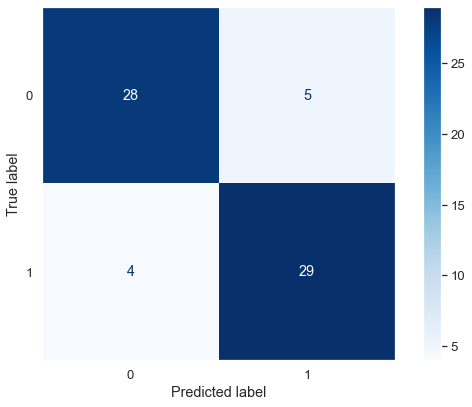



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.85      0.88      0.87        33

    accuracy                           0.86        66
   macro avg       0.86      0.86      0.86        66
weighted avg       0.86      0.86      0.86        66



********************************************************************************


In [30]:
from sklearn.ensemble import StackingClassifier
stc = StackingClassifier(estimators=[('rfc', rfc), ('etc',et)],
                         final_estimator=VotingClassifier(estimators=[('rfc', rfc), ('etc',et)],
                        voting='soft',             #soft takes probability score
                        weights=None,              #weights for each classifier
                        n_jobs=-1),
                         cv=None,
                         stack_method='predict',   #or 'predict_proba'
                         passthrough=False, #When True the final_estimator is trained on the predictions as well as the original training data.
                         n_jobs=-1) 

print('Results for Stacking classifier:-\n')
start_time = time.time()
stc.fit(X_train,y_train)
stc_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',stc_time)

y_pred1 = stc.predict(X_train)

start_time = time.time()
y_pred = stc.predict(X_test)
stc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',stc_time2)

try:
    y_pred_prob1 = stc.predict_proba(X_train)
    y_pred_prob = stc.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_stc = confusion_matrix(y_test, y_pred)
stc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_stc = balanced_accuracy_score(y_train,y_pred1)
acc2_stc = balanced_accuracy_score(y_test,y_pred)
loss1_stc = log_loss(y_train,y_pred_prob1)
loss2_stc = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_stc)
print('Testing accuracy = ',acc2_stc)
print('\n')
print('*'*80)  

print('\nTraining log_loss = ',loss1_stc)
print('Testing log_loss = ',loss2_stc)
print('\n')
print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_stc[i])-cm_stc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',stc_miss)
print('Total % of missclassified points (test data) = ',(stc_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 


STC = [acc1_stc, acc2_stc, stc_miss, stc_miss/len(y_test), stc_time, stc_time2]

In [31]:
s1=[LR,LDA,QDA,LSVC,SVC,KNN,DTC,ETC,RFC,ET,VTC,STC]
s2=['LR','LDA','QDA','LSVC','SVC','KNN','DTC','ETC','RFC','ET','VTC','STC']
col=['Train score','Test score','No of Missclassification','% of Missclasification','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]
    
temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result['% of Missclasification'] *= 100

In [32]:
result

,Classifiers,Train score,Test score,No of Missclassification,% of Missclasification,Training time,Prediction time
0,LR,0.847328,0.818182,12,18.181818,8.239647,0.000995
1,LDA,0.839695,0.833333,11,16.666667,0.003997,0.001000
2,QDA,0.862595,0.787879,14,21.212121,0.016003,0.000997
3,LSVC,0.851145,0.833333,11,16.666667,0.020007,0.000000
4,SVC,0.912214,0.818182,12,18.181818,0.008006,0.005014
5,KNN,0.858779,0.878788,8,12.121212,0.009021,0.127268
6,DTC,1.000000,0.772727,15,22.727273,0.008032,0.000000
7,ETC,1.000000,0.803030,13,19.696970,0.007999,0.000999
8,RFC,0.896947,0.848485,10,15.151515,0.428743,0.110207
9,ET,1.000000,0.878788,8,12.121212,0.547042,0.109422


In [33]:
import joblib

joblib.dump(et, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']